**Cell 1: Imports & Load Data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

df = pd.read_csv("/content/insurance_premium_dataset.csv")
df.head()

,city,locality_category,age,annual_income,bmi,smoker,chronic_disease_count,policy_type,sum_insured,previous_claims,credit_score,occupation_type,annual_premium
0,Chennai,Middle-Income,32,9.943066e+05,30.092119,0,0,Basic,2000000,0,751,Government,30710.21
1,Chennai,Middle-Income,50,9.627680e+05,24.967849,0,0,Standard,500000,0,787,Government,15146.19
2,Chennai,Industrial Area,69,6.366852e+05,24.443690,0,0,Basic,2000000,1,864,Business,61052.49
3,Chennai,Industrial Area,61,6.093321e+05,21.865405,1,0,Standard,500000,0,653,Business,43896.42
4,Chennai,Low-Income,46,1.021540e+06,24.685473,0,0,Basic,2000000,1,652,Business,57050.59


**Cell 2: Dataset Overview**

In [5]:
df.shape

(50000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   50000 non-null  object 
 1   locality_category      50000 non-null  object 
 2   age                    50000 non-null  int64  
 3   annual_income          50000 non-null  float64
 4   bmi                    50000 non-null  float64
 5   smoker                 50000 non-null  int64  
 6   chronic_disease_count  50000 non-null  int64  
 7   policy_type            50000 non-null  object 
 8   sum_insured            50000 non-null  int64  
 9   previous_claims        50000 non-null  int64  
 10  credit_score           50000 non-null  int64  
 11  occupation_type        50000 non-null  object 
 12  annual_premium         50000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 5.0+ MB


In [7]:
df.describe()


,age,annual_income,bmi,smoker,chronic_disease_count,sum_insured,previous_claims,credit_score,annual_premium
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,43.394800,8.011537e+05,24.026722,0.249500,0.600020,9.550820e+05,0.400380,749.742500,46794.711631
std,14.977488,2.975145e+05,4.009680,0.432728,0.780569,6.588411e+05,0.633312,86.723746,26767.500422
min,18.000000,1.200000e+05,7.168285,0.000000,0.000000,3.000000e+05,0.000000,600.000000,5403.570000
25%,30.000000,5.949417e+05,21.319713,0.000000,0.000000,5.000000e+05,0.000000,674.000000,27247.515000
50%,43.000000,8.001342e+05,24.013160,0.000000,0.000000,1.000000e+06,0.000000,750.000000,40604.390000
75%,56.000000,1.004467e+06,26.730974,0.000000,1.000000,2.000000e+06,1.000000,825.000000,59555.945000
max,69.000000,2.108549e+06,42.777891,1.000000,5.000000,2.000000e+06,5.000000,899.000000,220292.760000


**Cell 3: Missing Values Check**

In [8]:
df.isnull().sum()

,0
city,0
locality_category,0
age,0
annual_income,0
bmi,0
smoker,0
chronic_disease_count,0
policy_type,0
sum_insured,0
previous_claims,0


**Cell 4: Target Variable Distribution**

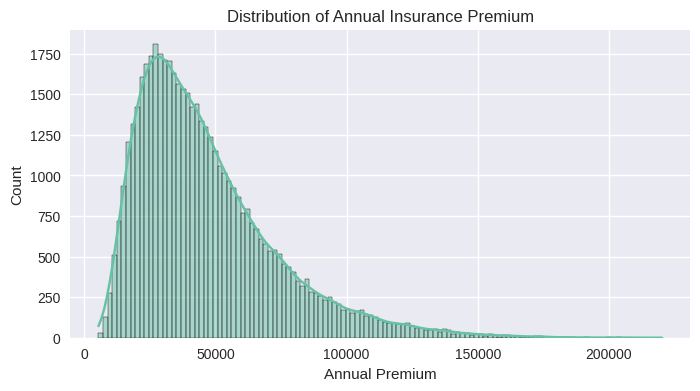

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df["annual_premium"], kde=True)
plt.title("Distribution of Annual Insurance Premium")
plt.xlabel("Annual Premium")
plt.show()

**Cell 5: City-wise Premium Comparison**

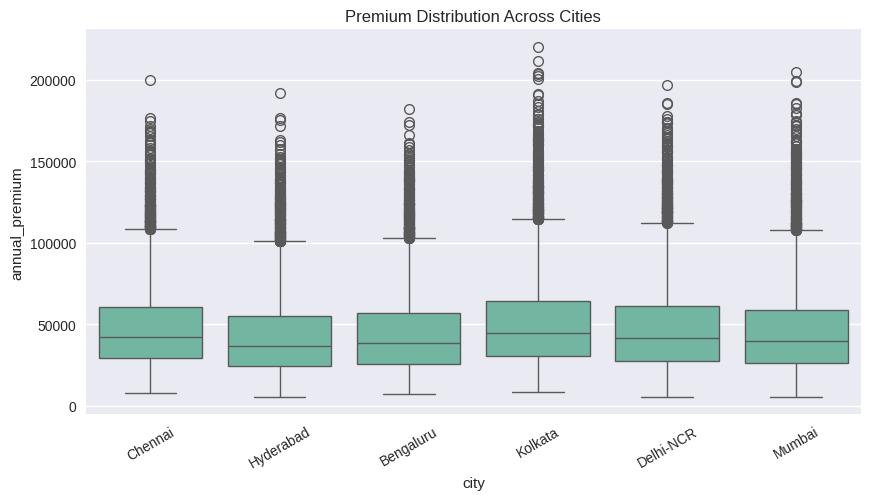

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="city", y="annual_premium", data=df)
plt.xticks(rotation=30)
plt.title("Premium Distribution Across Cities")
plt.show()


**Cell 6: Locality Category vs Premium**

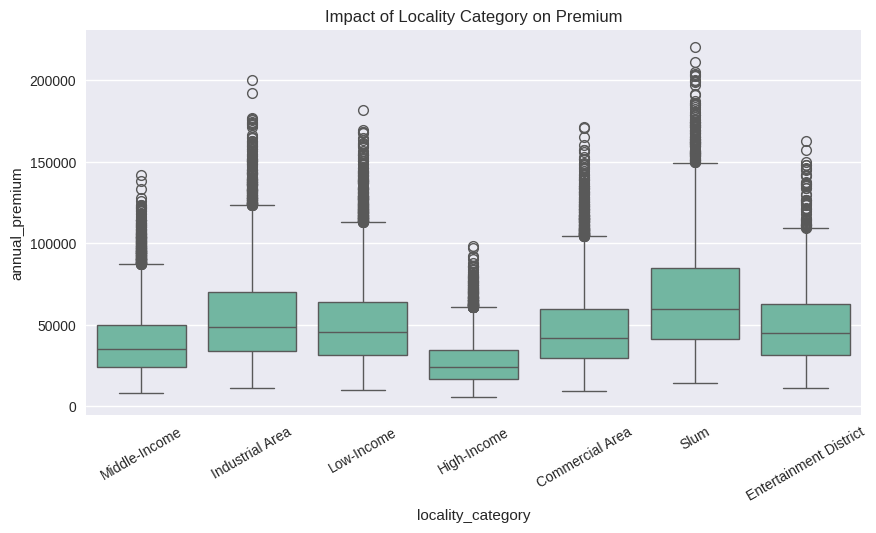

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x="locality_category", y="annual_premium", data=df)
plt.xticks(rotation=30)
plt.title("Impact of Locality Category on Premium")
plt.show()


**Cell 7: Smoker vs Non-Smoker**

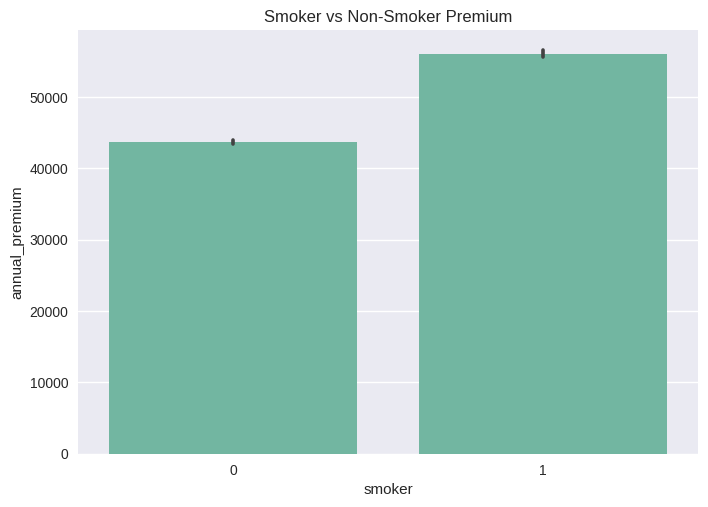

In [12]:
sns.barplot(x="smoker", y="annual_premium", data=df)
plt.title("Smoker vs Non-Smoker Premium")
plt.show()


**Cell 8: Correlation Heatmap (Numerical)**

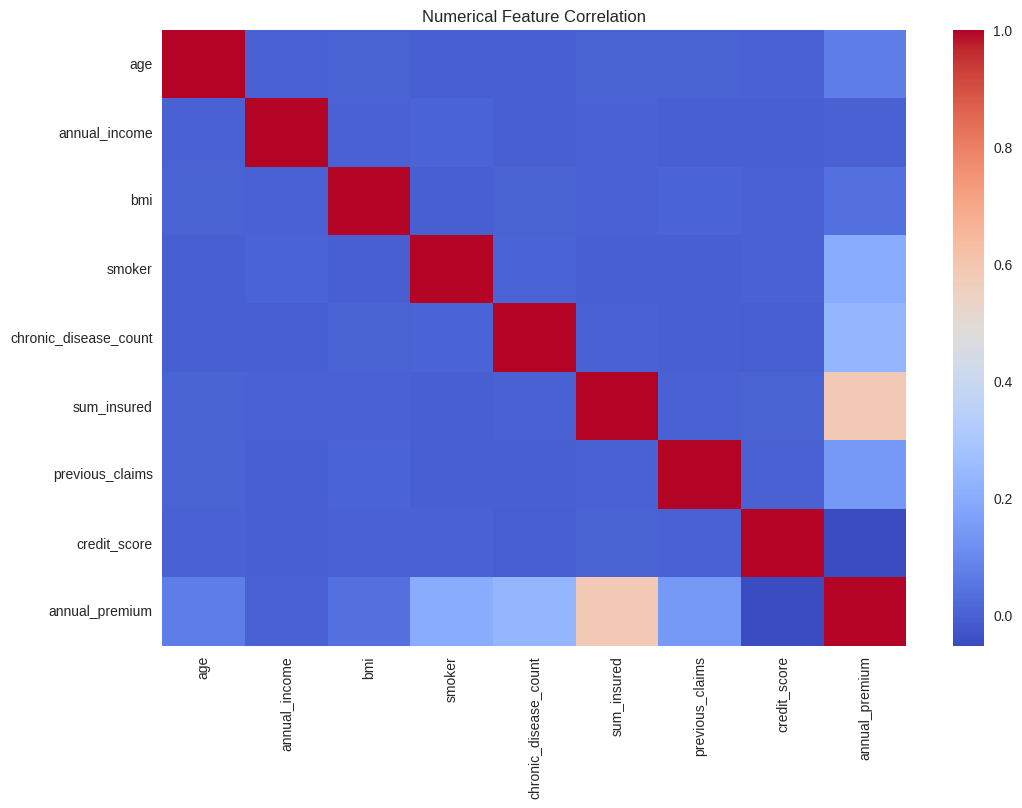

In [13]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Numerical Feature Correlation")
plt.show()